# **Installing the required packages**

In [ ]:
!pip install sep
!pip install fitsio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fitsio: filename=fitsio-1.2.1-cp310-cp310-linux_x86_64.whl size=820189 sha256=b59a6f672c44fa88de541b9a2e9c8de2bd3742b051c90ddd95f5fa49b02eab52
  Stored in directory: /root/.cache/pip/wheels/94/70/18/2789914e7e79d73c282daba3cc5e5984c5e9a84962f68bf7bc
Successfully built fitsio


## **Importing the required packages**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sep
from astropy.io import fits
import fitsio

## **Loading images**

In [ ]:
from google.colab import files
image1 = files.upload()
#image2 = files.upload()

Saving goodsn_F850LP_BA.fits to goodsn_F850LP_BA.fits


## **Displaying the images**

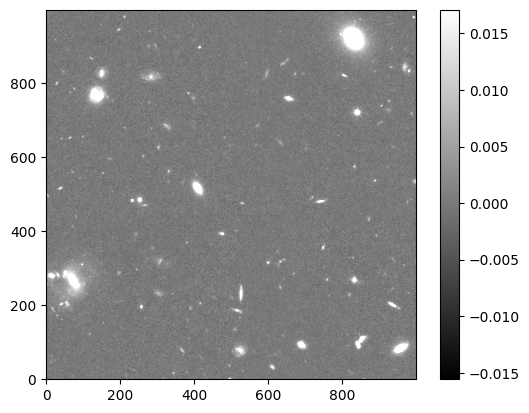

In [ ]:
image = fitsio.read("goodsn_F850LP_BA.fits")
m, s = np.mean(image), np.std(image)

plt.imshow(image, interpolation='hanning', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()
plt.show()

7.265847443704843e-07
0.0019270943012088537


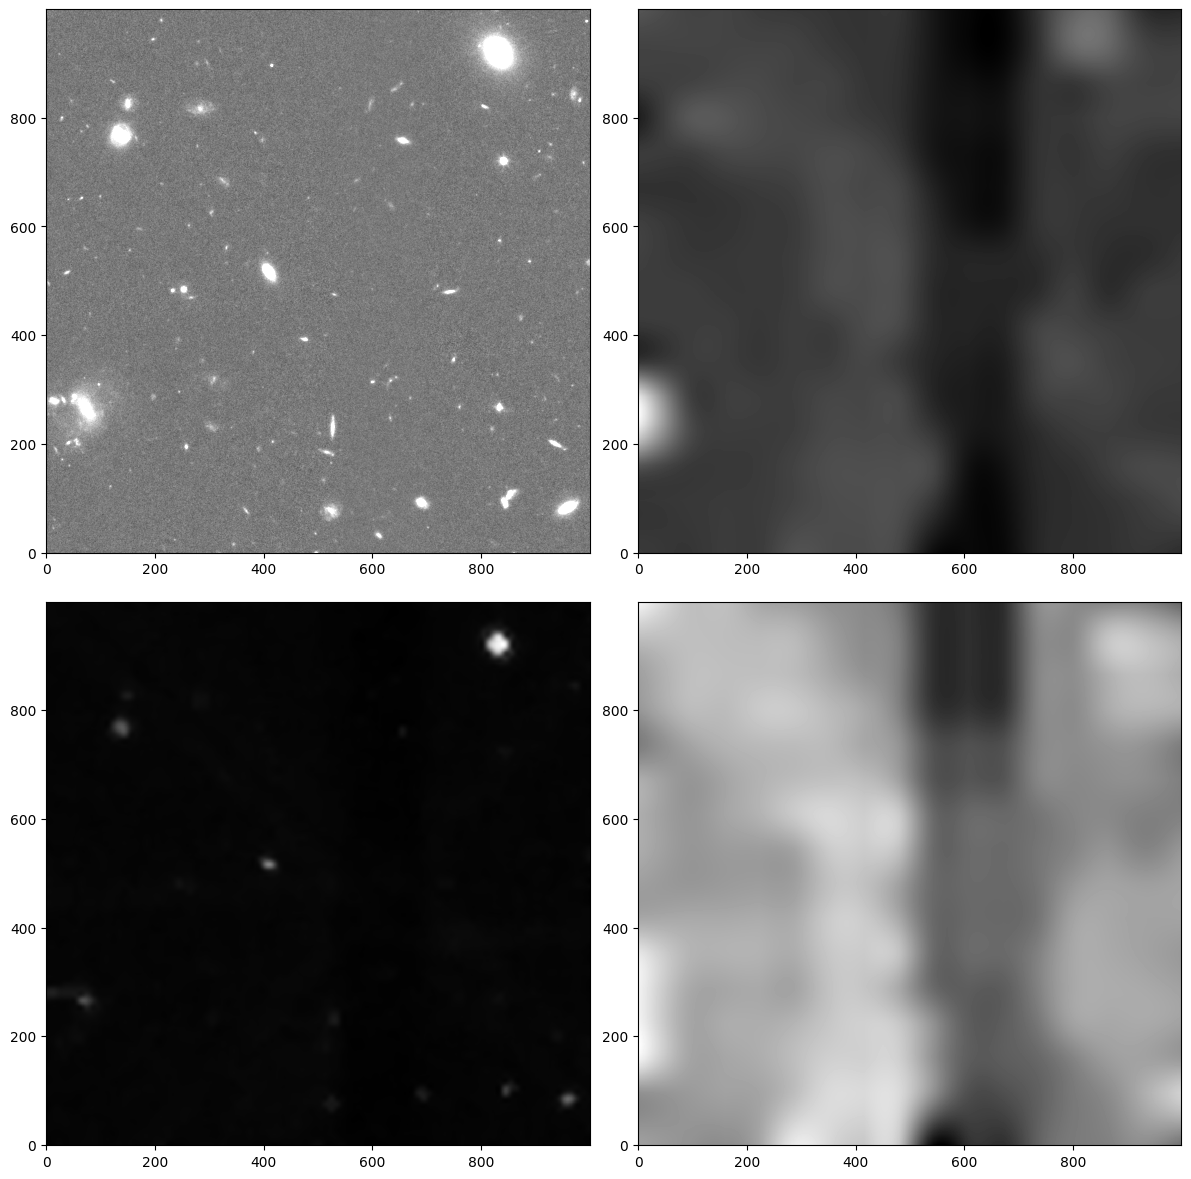

In [ ]:
fig1 = plt.figure(figsize=(12, 12))
ax1 = fig1.add_subplot(221)
ax2 = fig1.add_subplot(222)
ax3 = fig1.add_subplot(223)
ax4 = fig1.add_subplot(224)


cax1 = ax1.imshow(image, interpolation='hanning', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')


bkg = sep.Background(image, bw=64, bh=64, fw=3, fh=3)

bkg_rms = bkg.rms()
cax2 = ax2.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
# cax1.colorbar()

bkg = sep.Background(image, bw=10, bh=10, fw=3, fh=3)

bkg_rms = bkg.rms()
cax3 = ax3.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')

bkg = sep.Background(image, bw=64, bh=64, fw=5, fh=5)

bkg_rms = bkg.rms()
cax4 = ax4.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
# cax2.colorbar()
fig1.tight_layout()
print(bkg.globalback)
print(bkg.globalrms)

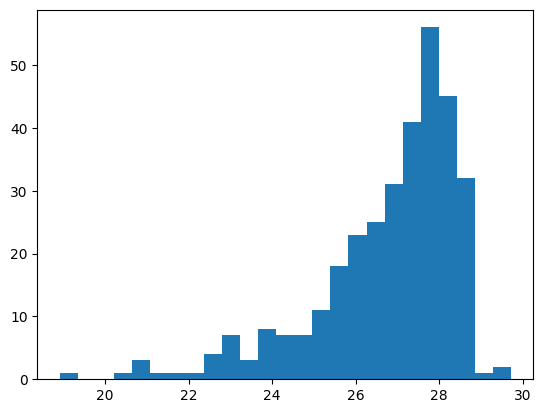

In [ ]:
# objects = sep.extract(image, 1.5, err=bkg.globalrms)
import math
import pandas as pd


objects = sep.extract(image, 1, err=bkg.globalrms, minarea=10,
    deblend_nthresh=32, deblend_cont=0.0005)

len(objects)
a1 = objects['x']
a2 = objects['y']
a3 = objects['flux']
a4 = []
np.savetxt('sep_t1.dat',np.transpose([a1,a2,a3]), fmt='%10.6f %10.6f %10.6f')

data1_df = pd.read_csv('./sep_t1.dat',header=None, sep='\s+')
data1_df.columns = ['x', 'y', 'flux']

for index, row in data1_df.iterrows():
    if(row['flux']>0):

        m1 = -2.5*math.log10(row['flux'])+25
        a4.append(m1)

a4 = np.array(a4)

plt.hist(a4,bins=25)
# plt.xscale('log')
plt.show()

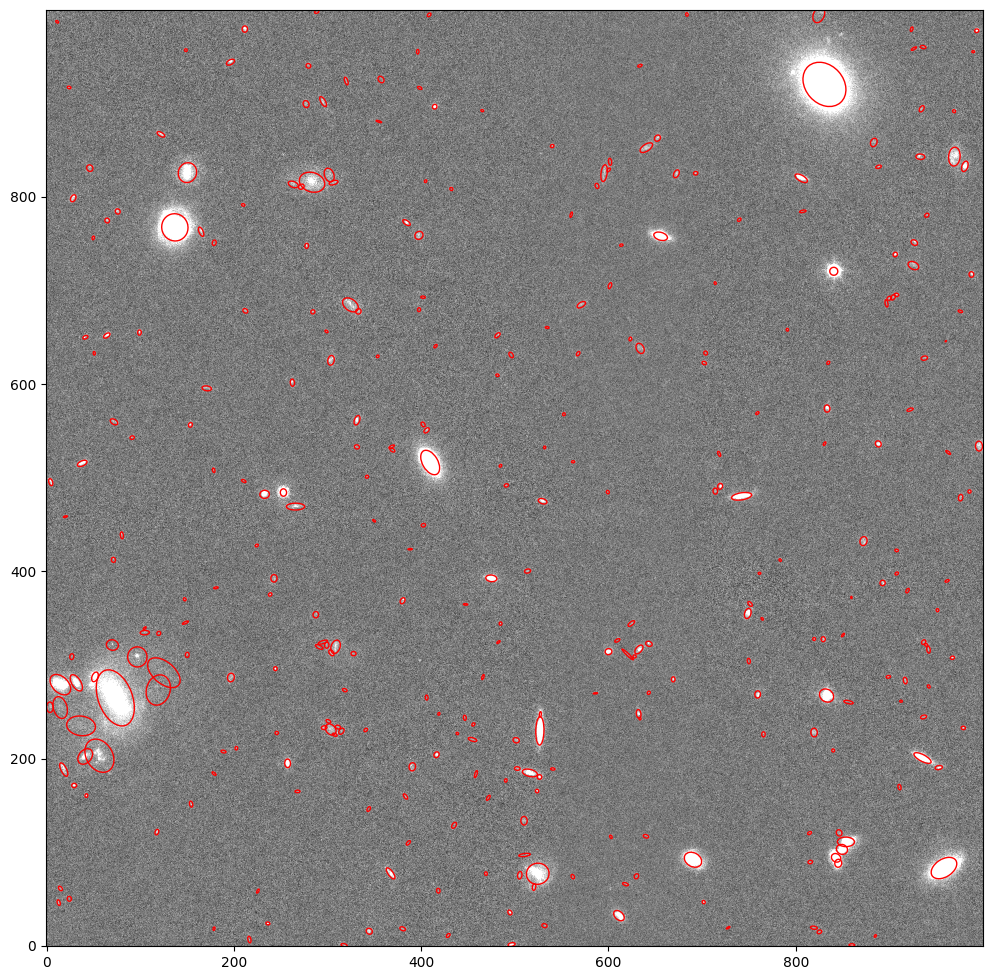

In [ ]:
from matplotlib.patches import Ellipse
# %matplotlib tk
# plot background-subtracted image
fig, ax = plt.subplots(figsize=(10,10))
# m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(image, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=3*objects['a'][i],
                height=3*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

fig.tight_layout()